# Stack Overflow 2020 Survey Results-Exploratory Data Analysis
- This dataset was gotten from StackOverflow. It contains over 60,000 responses from their Annual developer survey from over 150 countries. This survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software. As a budding data scientist it will be exciting to explore demographics and other insights from the respondents in the data science field.



Load the data set

In [58]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [3]:
pwd = os.getcwd()
survey_raw_df = pd.read_csv(pwd + '/survey_results_public.csv')
survey_raw_df



,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
#read the schema in to understand the columns
schema_raw = pd.read_csv(pwd + '/survey_results_schema.csv', index_col='Column').QuestionText
schema_raw

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [5]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

Data Preparation and Cleaning

For this analysis I'm interested in the following areas:
Demographics of the survey respondents
Distribution of Programing skills, experience and preferences
Employment-related information, preferences and opinions

In [6]:
#select a subset of columns with the relevant data for our analysis
selected_columns = ['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist', 'Age1stCode','YearsCode',
'YearsCodePro', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'NEWLearn', 'NEWStuck', 'Employment','DevType',
'WorkWeekHrs','JobSat', 'JobFactors','NEWOvertime', 'NEWEdImpt']
len(selected_columns)


20

Make a copy of our dataset before we start modifying so as not to affect the original data frame

In [7]:
survey_df = survey_raw_df[selected_columns].copy()
schema = schema_raw[selected_columns]

lets view info about the data

In [8]:
schema.shape

(20,)

In [9]:
survey_df.shape

(64461, 20)

In [10]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageDesireNextYear  54113 non-null  object 
 10  LanguageWorkedWith      57378 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

I need to convert some of the columns to a numerical data type

In [11]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [12]:
survey_df['Age1stCode'] =pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode'] =pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] =pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

basic statistics about numeric columns

In [13]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be an issue with the age column and WorkWeeK Hrs. 

- Min age is 1 and max age is 279 which signifies something is off. Since this is a survey, it is likely that some of the responses might be filled with mistakes. i will exclude the rows will where the age is < 10 years and >100 years.Those rows will be regarded as invalid responses.

In [14]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

I'll do the same for workweek hours. Drop reponses with hours greater than 140 hours.

In [15]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

In [16]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

It seems like some of the participants have picked more than one gender. I'm going to replace those vlaues with nas

In [17]:
survey_df.where(~(survey_df.Gender.str.contains(';', na =False)), np.nan, inplace = True)

In [18]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageDesireNextYear,LanguageWorkedWith,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
27727,Colombia,38.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,8.0,25.0,15.0,Python,Bash/Shell/PowerShell;HTML/CSS;SQL,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Database administrator;Developer, back-end",45.0,Very dissatisfied,Financial performance or funding status of the...,Rarely: 1-2 days per year or less,Very important
39448,India,NaN,NaN,Some college/university study without earning ...,"Information systems, information technology, o...",Yes,12.0,1.0,NaN,Go;Haskell;JavaScript;Kotlin;Objective-C;Python;R,C;C++;HTML/CSS;Java,Once a year,NaN,Student,NaN,NaN,NaN,Industry that I’d be working in;Specific depar...,NaN,NaN
43386,Lithuania,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",Yes,16.0,10.0,3.0,NaN,C;C#;C++;Objective-C;TypeScript,Once a year,NaN,Employed full-time,"Developer, game or graphics",40.0,Slightly satisfied,"Industry that I’d be working in;Languages, fra...",Occasionally: 1-2 days per quarter but less th...,Fairly important
37831,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,Once a year,Meditate;Visit Stack Overflow;Watch help / tut...,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
45703,New Zealand,50.0,Man,Some college/university study without earning ...,I never declared a major,Yes,14.0,25.0,20.0,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;HTML/CSS;JavaScript;SQL,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, full-stack",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Somewhat important
35854,United States,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,5.0,3.0,Rust;Swift,Assembly;Bash/Shell/PowerShell;C;C#;C++;Go;HTM...,Once a year,NaN,Employed full-time,"Designer;Developer, back-end;Developer, front-...",40.0,Very satisfied,Industry that I’d be working in;Flex time or a...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
33118,Austria,NaN,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","A humanities discipline (such as literature, h...",Yes,10.0,25.0,NaN,Scala,Bash/Shell/PowerShell;Java;Python;Scala,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...",Academic researcher;Educator,30.0,Very satisfied,NaN,Often: 1-2 days per week or more,Very important
61558,United States,36.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",Yes,9.0,9.0,9.0,C#;HTML/CSS;SQL;TypeScript,C#;HTML/CSS;JavaScript;Python;SQL;TypeScript,Once every few years,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",36.0,Very satisfied,Industry that I’d be working in;Flex time or a...,Occasionally: 1-2 days per quarter but less th...,Fairly important
31233,Germany,34.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,10.0,24.0,3.0,C++;Python;Swift,Python,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Academic researcher;Data scientist or machine ...,40.0,Very satisfied,"Industry that I’d be working in;Languages, fra...",Sometimes: 1-2 days per month but less than we...,Very important
56198,Spain,43.0,Man,"Other doctoral degree (Ph.D., Ed.D., etc.)","Computer science, computer engineering, or sof...",Yes,11.0,34.0,22.0,C#;HTML/CSS;Java;JavaScript;Python,C;C#;HTML/CSS;Ja

## Exploratory Analysis and Visualization

### Country
lets look at the no. of countries for which there are responses in the survey

In [19]:
schema.Country

'Where do you live?'

In [23]:
#top countries with responses
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

look at this with a bar graph

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Where do you live?'}, ylabel='Country'>

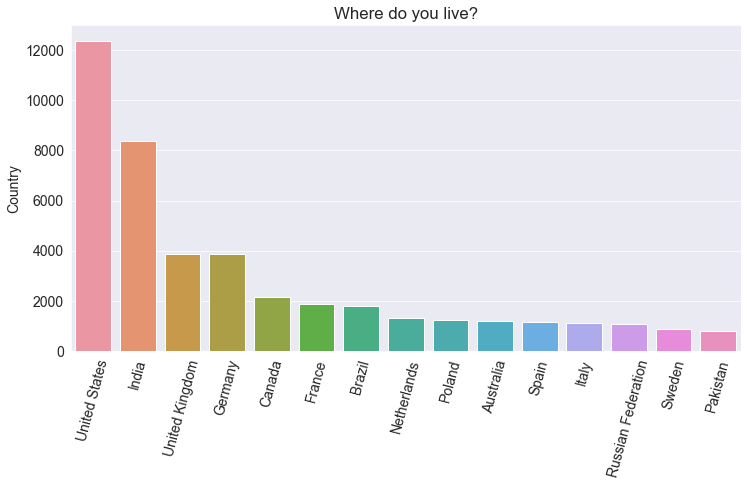

In [21]:
plt.figure(figsize= (12,6))
plt.xticks(rotation = 75) #so the x labels don't print horizontally
plt.title(schema.Country)
sns.barplot(top_countries.index, top_countries)

A very high number of participants are from the US and India. This could be because:
- the survey is in English
- Stack over flow users are mostly english speakers
This survye might not be a good representative of the programming community


### Age

(array([2.0900e+02, 2.4190e+03, 9.1350e+03, 1.1938e+04, 8.7390e+03,
        5.5820e+03, 3.0310e+03, 1.7560e+03, 1.0380e+03, 6.2200e+02,
        3.3300e+02, 1.4300e+02, 7.1000e+01, 2.4000e+01, 9.0000e+00,
        6.0000e+00, 3.0000e+00]),
 array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
        95]),
 <BarContainer object of 17 artists>)

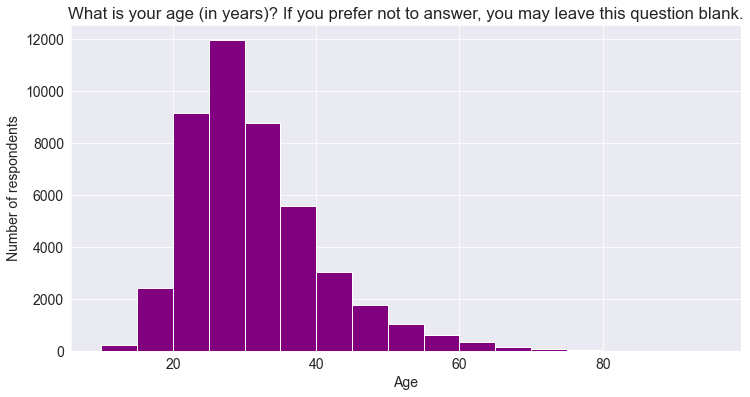

In [24]:
plt.figure(figsize =(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survey_df.Age, bins = np.arange(10,100,5), color= 'purple')

A large percentage of respondents are in the age range 20 - 45 years

### Gender

In [25]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [26]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A pie chart will bbe appropriate to visulaize the distribution of genders

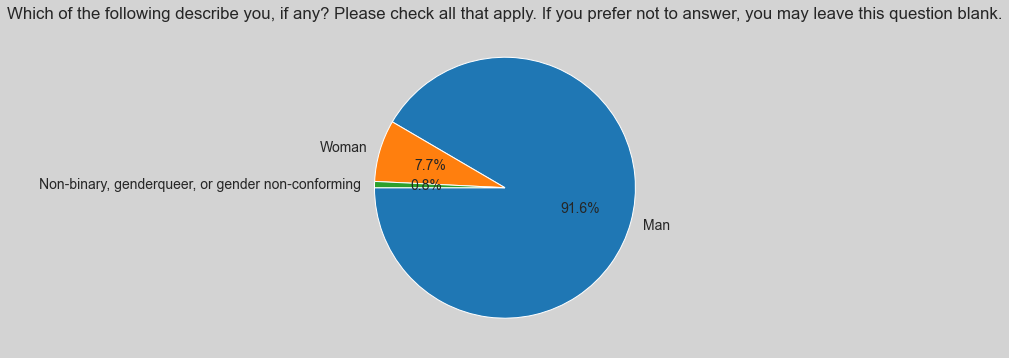

In [27]:
fig = plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle =180)
fig.set_facecolor('lightgrey')

Only about 7.7% of the respondents who have anwered the question identify as women or non binary, gender queer or gender non conforming. There is clearly a diversity issue in  the programming community. More representation is definitely needed
Now i am interested in how education and salarydiffers amongst the genders?

### Education level
Having formal education is often considered important in becoming a programmer. Let's see if this is indeed the case

In [28]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

i"ll use a bar plot to compare the education level of respondents

Text(0, 0.5, '')

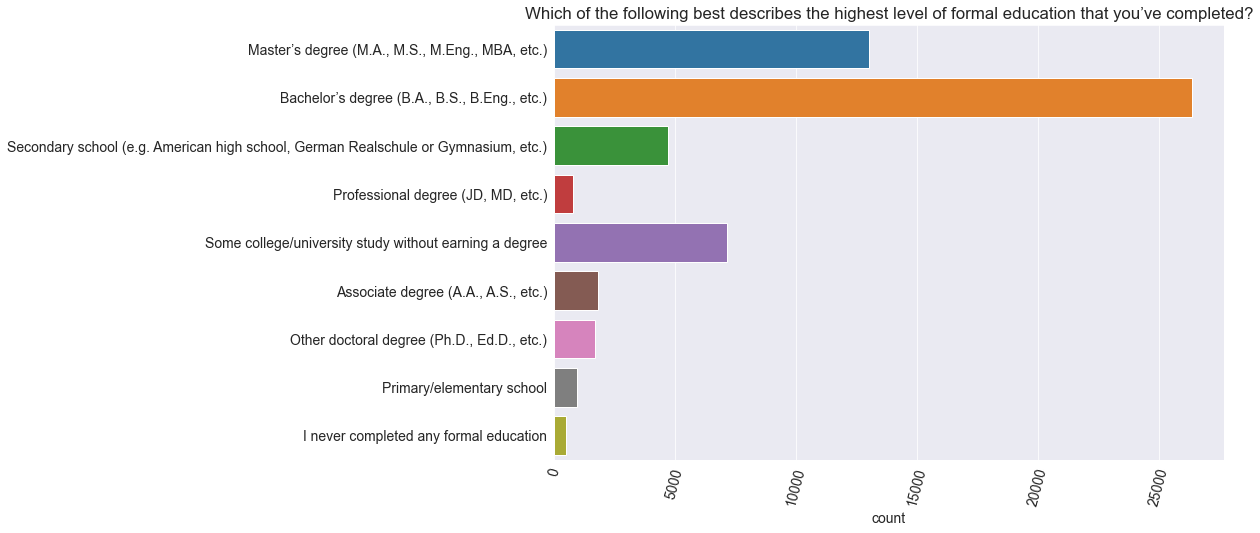

In [29]:
plt.figure(figsize=(12,8))
sns.countplot(y =survey_df.EdLevel)
plt.xticks(rotation=75)
plt.title(schema.EdLevel)
plt.ylabel(None)

Over 25,000 respondents have a Bachelors degree and about 13,000 respondents hold a Masters degree. This signifies that most programmers have some level of education.

lets look at percentages instead, further break down the graph to compare the percentages foe each degree for men vs women

In [30]:
highest_level = survey_df.EdLevel.value_counts() * 100 / survey_df.EdLevel.count()



/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Percentage')

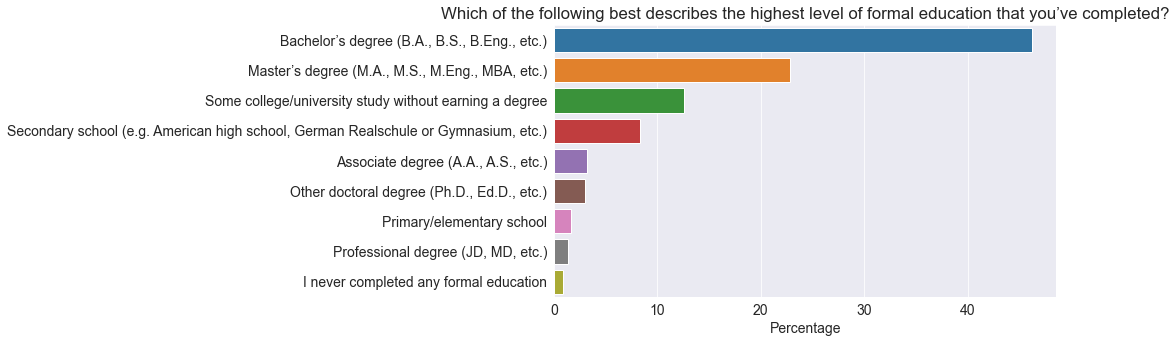

In [31]:
sns.barplot(highest_level, highest_level.index)
plt.title(schema.EdLevel)
plt.ylabel(None)
plt.xlabel('Percentage')

lets plot the under grad majors. using percentages

In [76]:
schema.UndergradMajor

'What was your primary field of study?'

In [32]:
#getting the percentage
undergrad_pct = survey_df.UndergradMajor.value_counts() *100 /survey_df.UndergradMajor.count()
undergrad_pct

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Percentage')

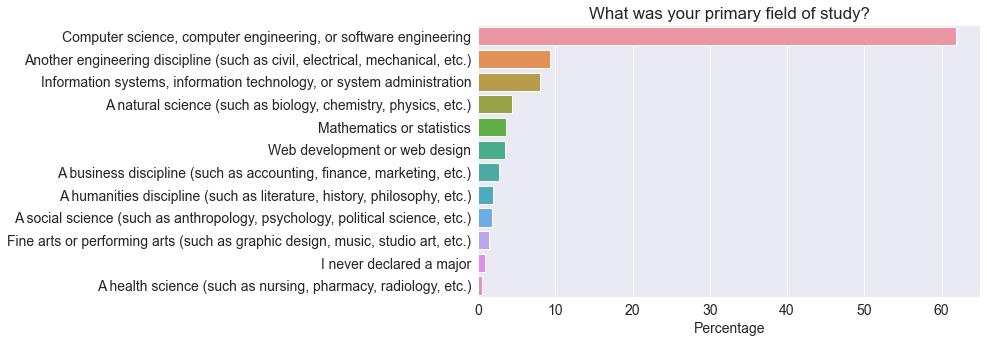

In [33]:
sns.barplot(undergrad_pct, undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None)
plt.xlabel('Percentage')

40% of programmers who have a college degree have a degree in a field other than computer science. This shows education is helpful but you can still be a successufl programmer without studying computer science

In [34]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

In [35]:
formal_education_pct = survey_df.NEWEdImpt.value_counts() * 100 /survey_df.NEWEdImpt.count()

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Percentage')

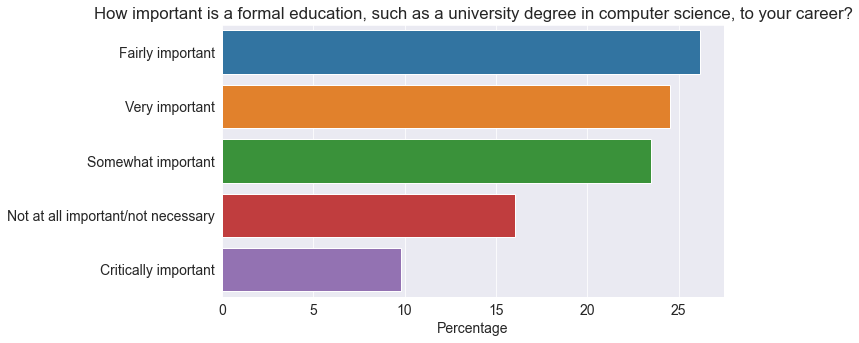

In [36]:
sns.barplot(formal_education_pct, formal_education_pct.index)
plt.title(schema.NEWEdImpt)
plt.ylabel(None)
plt.xlabel('Percentage')

In [ ]:
gender_df = survey_df.loc[ : , ['EdLevel', 'Gender']]
gender_df
#count_gender = gender_df.pivot_table(gender_df, index = ['EdLevel','Gender' ], aggfunc= 'count')
#count_gender

I'm interested in looking at the breakdown of the highest degree attained by Gender

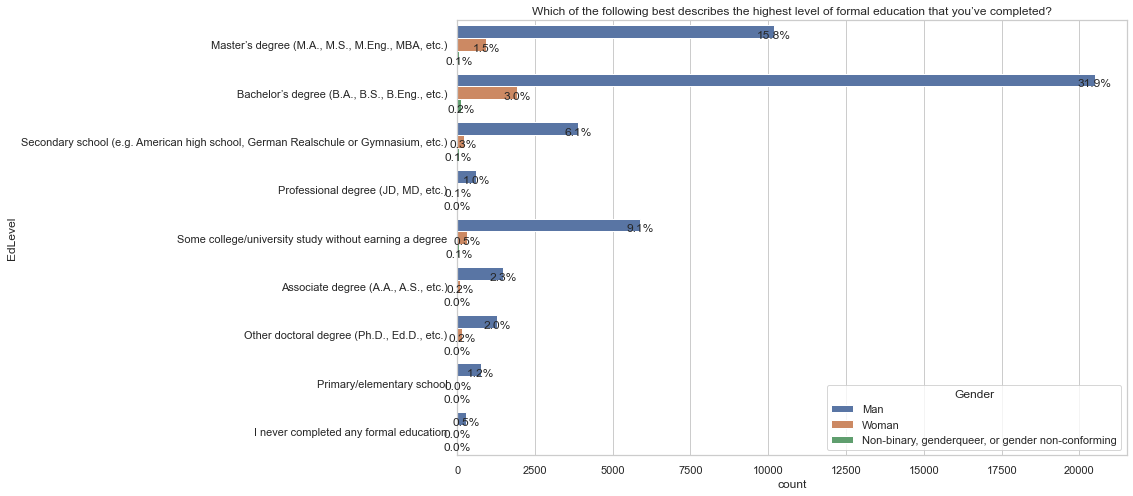

In [119]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(survey_df))
ax = sns.countplot(y ='EdLevel', hue = "Gender", data = survey_df)
plt.title(schema.EdLevel)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    y = p.get_y() + p.get_height()
    x = p.get_width()
    ax.annotate(percentage, (x, y),ha='center')

plt.show()

In [89]:
survey_df.columns

Index(['Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor', 'Hobbyist',
       'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageDesireNextYear',
       'LanguageWorkedWith', 'NEWLearn', 'NEWStuck', 'Employment', 'DevType',
       'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime', 'NEWEdImpt'],
      dtype='object')

### Employment
It will be interesting to see and compare the breakdown of full time, part time and free lance work.

In [121]:
schema.Employment

'Which of the following best describes your current employment status?'

Text(0.5, 0, 'Percentages')

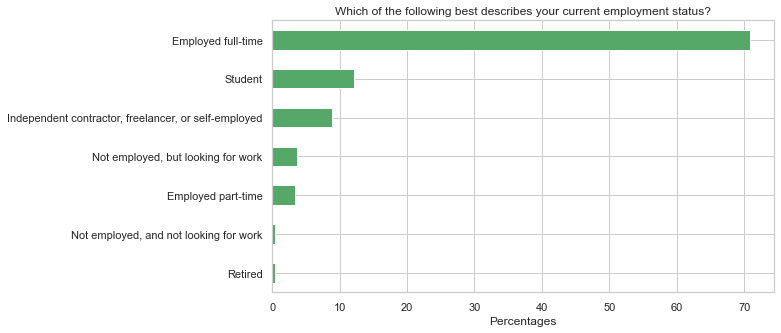

In [122]:
(survey_df.Employment.value_counts(normalize= True,ascending= True)*100).plot(kind ='barh', color ='g')
plt.title(schema.Employment)
plt.xlabel('Percentages')



Only about 10 % of programmers are employed partime as free lancers or self employed and about 12 % of programmers are students.

Let's look at the different types of roles held by the respondents

In [123]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [124]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

In [125]:
#I need to get the columns separated by a semi colon and split them into multiple columns 
#define a helper function
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    #iterate over the column
    for idx, value in col_series [col_series.notnull()].iteritems():
        #break each valueinto list of options
        for option in value.split(';'):
            #add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
                #mark the value in the option columns ad True
            result_df.at[idx, option] = True
    return result_df[options]



In [126]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df


,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The dev_type_df has one column for each option that can be selected as a response. If a respondent as selected an option, the value in the column is True otherwise it is False.
I can analyse this to identify the common roles

In [215]:
dev_type_totals = dev_type_df.sum().sort_values(ascending = False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

Developer roles seem to be the most common roles

In [157]:
#what percentage of respondents work in roles related to data science
data_science_pct = dev_type_totals.loc['Data scientist or machine learning specialist']*100/dev_type_totals.sum()
data_science_pct

2.5319628979694158

3939 respondents work in roles related to data science. About 3 % of the total respondents are in the data scince field. Now, I'm interested to know how many of them are women.

In [167]:
#what percentage of respondents work in roles related to data science
#which roles have the highest percenatge of women
dev_type_new = dev_type_totals.to_frame().reset_index()
dev_type_new.rename(columns={'index': 'DevType'}, inplace=True)
dev_type_new.rename(columns={0: 'Count_of_DevType'}, inplace=True)
dev_type_new


,DevType,Count_of_DevType
0,"Developer, back-end",26996
1,"Developer, full-stack",26915
2,"Developer, front-end",18128
3,"Developer, desktop or enterprise applications",11687
4,"Developer, mobile",9406
5,DevOps specialist,5915
6,Database administrator,5658
7,Designer,5262
8,System administrator,5185
9,"Developer, embedded applications or devices",4701


In [168]:
survey_merged = pd.merge(left= dev_type_new,right = survey_df, how ='left', left_on =['DevType'],right_on = ['DevType'])
survey_merged

,DevType,Count_of_DevType,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,...,LanguageDesireNextYear,LanguageWorkedWith,NEWLearn,NEWStuck,Employment,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,"Developer, back-end",26996,United States,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,19.0,...,HTML/CSS;Perl,Bash/Shell/PowerShell;HTML/CSS;Perl,Once every few years,Play games;Visit Stack Overflow;Do other work ...,Employed full-time,45.0,Very satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Very important
1,"Developer, back-end",26996,Germany,45.0,Man,"Professional degree (JD, MD, etc.)","Another engineering discipline (such as civil,...",Yes,14.0,30.0,...,Bash/Shell/PowerShell;Go;Java;Julia;Kotlin;Pyt...,Bash/Shell/PowerShell;Java;Kotlin;PHP;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,42.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important
2,"Developer, back-end",26996,United States,38.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fine arts or performing arts (such as graphic ...,No,30.0,8.0,...,JavaScript;Ruby;SQL,JavaScript;Ruby;SQL,Once every few years,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,30.0,Slightly dissatisfied,Flex time or a flexible schedule;Remote work o...,Rarely: 1-2 days per year or less,Not at all important/not necessary
3,"Developer, back-end",26996,India,NaN,NaN,NaN,Web development or web design,Yes,22.0,NaN,...,C#;JavaScript;SQL;TypeScript,C#;JavaScript;SQL;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,"Independent contractor, freelancer, or self-em...",NaN,Very satisfied,Family friendliness,Often: 1-2 days per week or more,Very important
4,"Developer, back-end",26996,Poland,20.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,17.0,2.0,...,C;JavaScript;Python;Ruby;Scala;TypeScript,C;C++;HTML/CSS;Python,Every few months,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,40.0,Very satisfied,Flex time or a flexible schedule;Office enviro...,Rarely: 1-2 days per year or less,Not at all important/not necessary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13684,Marketing or sales professional,625,United States,47.0,Man,"Associate degree (A.A., A.S., etc.)",NaN,Yes,13.0,1.0,...,Rust,Rust,NaN,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,85.0,Slightly dissatisfied,Industry that I’d be working in;Specific depar...,Often: 1-2 days per week or more,Somewhat important
13685,Marketing or sales professional,625,Thailand,NaN,NaN,I never completed any formal education,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,Employed full-time,NaN,Slightly dissatisfied,NaN,NaN,NaN
13686,Marketing or sales professional,625,Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A business discipline (such as accounting, fin...",Yes,14.0,2.0,...,HTML/CSS;JavaScript;PHP,HTML/CSS;JavaScript,Once a year,Visit Stack Overflow,Employed full-time,NaN,Slightly dissatisfied,NaN,NaN,Somewhat important
13687,Marketing or sales professional,625,Greece,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,34.0,...,Rust,Go;JavaScript;Python,Once every few years,NaN,Employed full-time,NaN,NaN,NaN,NaN,Critically important


In [173]:
data_devtype= survey_merged[survey_merged.DevType == 'Data scientist or machine learning specialist']

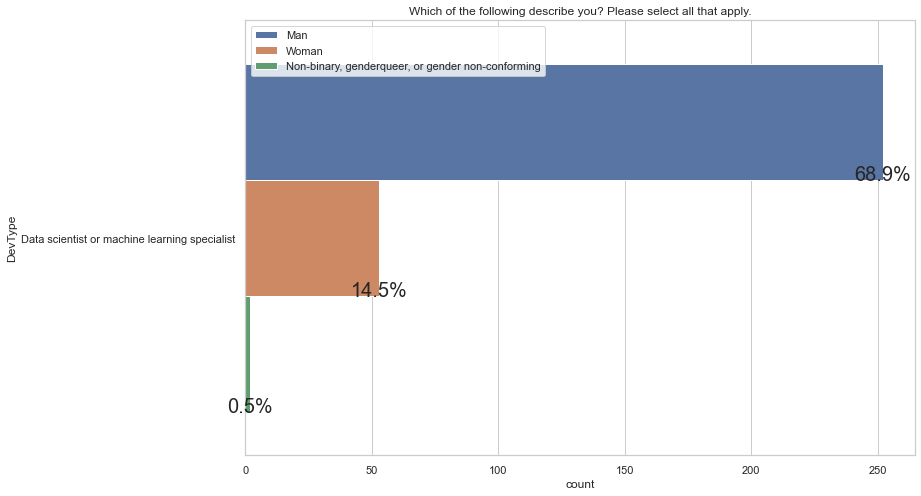

In [180]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
total = float(len(data_devtype))
ax = sns.countplot(y ='DevType', hue = "Gender", data = data_devtype)
plt.title(schema.DevType)
plt.legend(loc='upper left')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    y = p.get_y() + p.get_height()
    x = p.get_width()
    ax.annotate(percentage, (x, y),ha='center', fontsize = 20)

plt.show()

Only 14.5% of respondents who identify as women are data scientist. This means more representation is needed in the field and barriers for entry need to be broken down

### Language
- what's the most popular language use by the respondents?

In [183]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [181]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

Respondents were allowed to select multiple options. These options are separeated by a semicolon(;). So I would need to split them into multiple columns like i did for the Devtype column above.

In [184]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


25 languages were included in the data. I'll aggregate these to identify the percentage of respondents who selected each language

In [185]:
languages_worked_pct = languages_worked_df.mean().sort_values(ascending = False) * 100
languages_worked_pct

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

It seems like Javascript is the most popular language. Let's show the results on a bar plot

/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

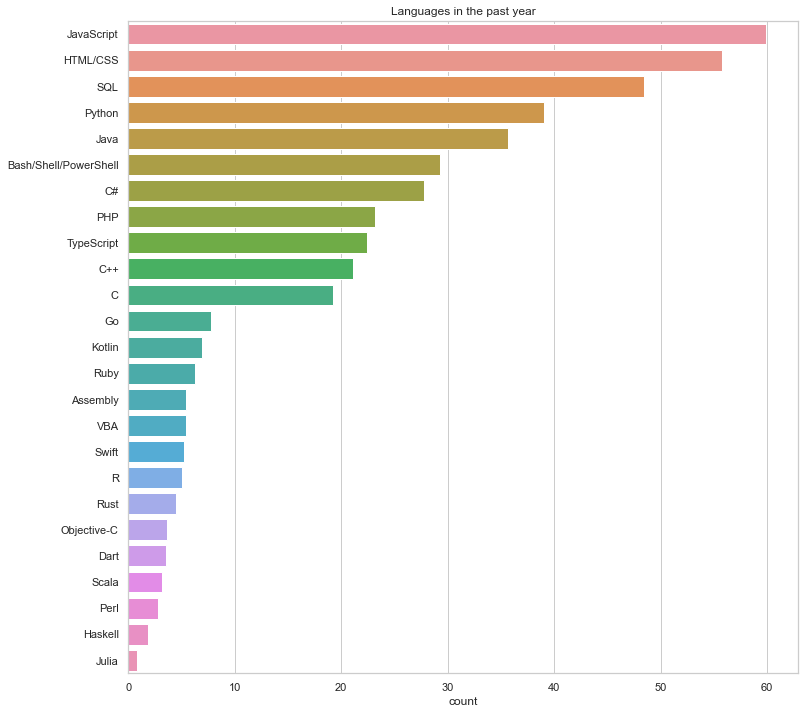

In [186]:
plt.figure(figsize=(12, 12))
sns.barplot(languages_worked_pct, languages_worked_pct.index)
plt.title('Languages in the past year')
plt.xlabel('count')

- Java script and HTML/ CSS are the top two popular languages
- SQL is the 3rd most popular language. Probably because as a programmer you need to ablt to pull data froma a database.
- Python

Now, I'm curious to know the most popular languages used by students and people who work in the field of data science

In [208]:
languages_worked_pct_new = languages_worked_pct.to_frame().reset_index()
languages_worked_pct_new.rename(columns={'index': 'LanguageWorkedWith'}, inplace=True)
languages_worked_pct_new.rename(columns={0: 'Count_of_LanguageWorkedWith_pct'}, inplace=True)
languages_worked_pct_new

,LanguageWorkedWith,Count_of_LanguageWorkedWith_pct
0,JavaScript,59.893323
1,HTML/CSS,55.801947
2,SQL,48.444935
3,Python,39.001026
4,Java,35.618760
5,Bash/Shell/PowerShell,29.239884
6,C#,27.803004
7,PHP,23.130035
8,TypeScript,22.461357
9,C++,21.114670


In [199]:
languages_worked_pct

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

In [209]:
#I already subset the data
#data_languages = data_devtype.LanguageWorkedWith.value_counts()
#data_languages
# lets merge our new language columns to the data set


survey_merged2 = pd.merge(left= languages_worked_pct_new,right = survey_df, how ='left', left_on =['LanguageWorkedWith'],right_on = ['LanguageWorkedWith'])
survey_merged2


,LanguageWorkedWith,Count_of_LanguageWorkedWith_pct,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,...,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,JavaScript,59.893323,Germany,53.0,Woman,NaN,"Computer science, computer engineering, or sof...",Yes,14.0,39.0,...,JavaScript,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Retired,NaN,NaN,NaN,NaN,NaN,Very important
1,JavaScript,59.893323,United States,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Yes,10.0,15.0,...,JavaScript;Rust,Once a decade,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, full-stack",40.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Fairly important
2,JavaScript,59.893323,United States,NaN,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,12.0,3.0,...,NaN,Once every few years,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, back-end;Engineer, data;System admi...",40.0,Very dissatisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Critically important
3,JavaScript,59.893323,United States,32.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,18.0,...,JavaScript,Once a decade,Play games;Go for a walk or other physical act...,Employed full-time,"Developer, back-end",50.0,Very satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important
4,JavaScript,59.893323,Portugal,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,16.0,...,C++;Go;JavaScript;Python;Rust;TypeScript,Once every few years,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,40.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Rarely: 1-2 days per year or less,Somewhat important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,Julia,0.782198,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Fine arts or performing arts (such as graphic ...,Yes,35.0,30.0,...,Julia,Once every few years,Visit Stack Overflow;Watch help / tutorial vid...,Retired,NaN,NaN,NaN,NaN,NaN,Not at all important/not necessary
3222,Julia,0.782198,United States,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,No,19.0,10.0,...,HTML/CSS;JavaScript;Julia,NaN,Meditate;Panic;Watch help / tutorial videos;Do...,Student,NaN,NaN,NaN,Remote work options;How widely used or impactf...,NaN,NaN
3223,Julia,0.782198,United Kingdom,26.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,Yes,12.0,NaN,...,Julia,Once a year,Go for a walk or other physical activity;Watch...,Student,NaN,NaN,NaN,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN
3224,Julia,0.782198,United States,NaN,NaN,NaN,NaN,Yes,NaN,NaN,...,Julia,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Student,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
data_languages = survey_merged2[survey_merged2.DevType =='Data scientist or machine learning specialist']
data_languages

,LanguageWorkedWith,Count_of_LanguageWorkedWith_pct,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,...,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
585,Python,39.001026,United States,NaN,NaN,"Other doctoral degree (Ph.D., Ed.D., etc.)",Mathematics or statistics,Yes,13.0,37.0,...,Python,Once every few years,Call a coworker or friend;Go for a walk or oth...,Employed full-time,Data scientist or machine learning specialist,45.0,Very satisfied,Remote work options;How widely used or impactf...,Occasionally: 1-2 days per quarter but less th...,Critically important
586,Python,39.001026,Canada,27.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,26.0,1.0,...,Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data scientist or machine learning specialist,35.0,Very satisfied,Industry that I’d be working in;Flex time or a...,Never,Somewhat important
591,Python,39.001026,Spain,24.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,5.0,...,Python,Once every few years,Meditate;Visit Stack Overflow,Employed full-time,Data scientist or machine learning specialist,41.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Office enviro...,Often: 1-2 days per week or more,Very important
593,Python,39.001026,Philippines,30.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Mathematics or statistics,No,21.0,2.0,...,R,Once every few years,Meditate;Call a coworker or friend;Visit Stack...,Employed full-time,Data scientist or machine learning specialist,40.0,Slightly satisfied,Flex time or a flexible schedule;Office enviro...,Often: 1-2 days per week or more,Fairly important
601,Python,39.001026,Argentina,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,18.0,9.0,...,Python,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data scientist or machine learning specialist,40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Fairly important
621,Python,39.001026,United States,33.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","A social science (such as anthropology, psycho...",Yes,16.0,2.0,...,Bash/Shell/PowerShell;Python,NaN,Play games;Visit Stack Overflow;Watch help / t...,"Not employed, but looking for work",Data scientist or machine learning specialist,NaN,NaN,Industry that I’d be working in;Opportunities ...,NaN,NaN
657,Python,39.001026,India,23.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",No,21.0,NaN,...,Python,Once a decade,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,Data scientist or machine learning specialist,9.0,Very satisfied,Flex time or a flexible schedule;Office enviro...,Sometimes: 1-2 days per month but less than we...,Somewhat important
680,Python,39.001026,India,15.0,Man,"Secondary school (e.g. American high school, G...",NaN,No,13.0,2.0,...,JavaScript,Once a decade,Play games;Visit Stack Overflow;Do other work ...,"Independent contractor, freelancer, or self-em...",Data scientist or machine learning specialist,40.0,NaN,NaN,Rarely: 1-2 days per year or less,Fairly important
685,Python,39.001026,Germany,28.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Information systems, information technology, o...",No,19.0,4.0,...,C++;Java;JavaScript;Python,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,Data scientist or machine learning specialist,40.0,Very satisfied,Industry that I’d be working in;Diversity of t...,Occasionally: 1-2 days per quarter but less th...,Very important
750,Python,39.001026,Poland,28.0,Man,NaN,Mathematics or statistics,Yes,21.0,8.0,...,C++;Python;R

In [227]:
data_languages.loc[:,['LanguageWorkedWith','Count_of_LanguageWorkedWith_pct']]

,LanguageWorkedWith,Count_of_LanguageWorkedWith_pct
585,Python,39.001026
586,Python,39.001026
591,Python,39.001026
593,Python,39.001026
601,Python,39.001026
621,Python,39.001026
657,Python,39.001026
680,Python,39.001026
685,Python,39.001026
750,Python,39.001026


/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'count')

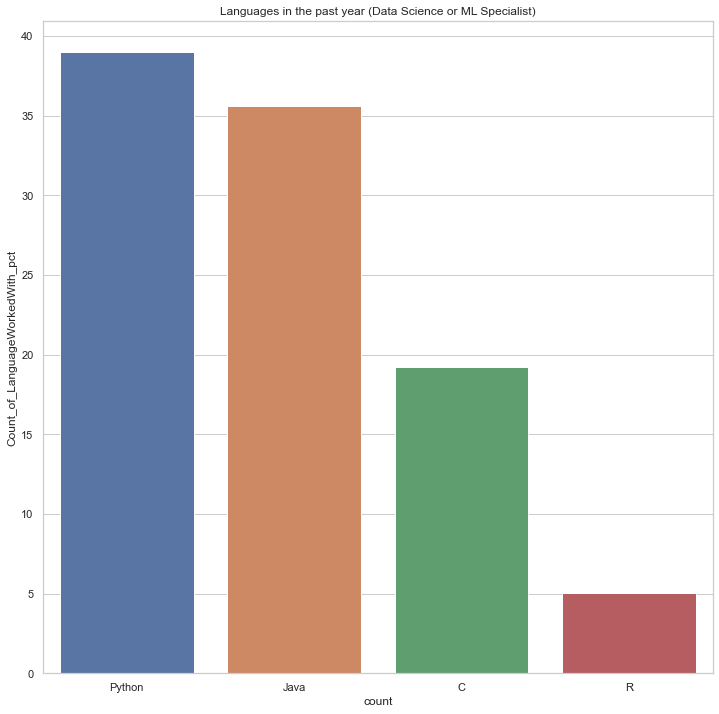

In [232]:
plt.figure(figsize=(12, 12))
sns.barplot( data_languages.LanguageWorkedWith,  data_languages.Count_of_LanguageWorkedWith_pct)
plt.title('Languages in the past year (Data Science or ML Specialist)')
plt.xlabel('count')

About 40 % of the respondents who work in data science or machine learning field work wiht python. Java is the second on the list. What i find surprising is that only about 5 % of respondents in the data science field work with R

# Conclusions

There were many interesting insights from the survey. Here's a few of them

- The programming community isn't as diverse as it would. As a woman looking to break into data science, only about 8% fo the respondents identified as women. More representation is clearly needed
- Although this survey is a good representative of the programming community, there weren't many responses from non-English speaking countries, women and non-binary
- As an aspiring data scientist, I was intersted to know more about the population. About 3 % of the total respondents are in the data scince field. Out of this about 15% of the women respondents work as data scientist or machine learnng specialist
- Most of the programmer have a Bachelors degree however a fair percentage didn't come from a computer science background. This is promising beacie it means that have a Bachelors in computer science is not compulsory to break into the field
- There is great prospect to work as an employee full time or be independent as a contractor
- Java scripts and HTML/CSS are the most used programming languages in 2020, SQL and Python follow right after
- A  high percentage of Data scientists and Machine learning specialist work with Python

